In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from ripser import ripser
from persim import plot_diagrams
import pickle
import warnings
warnings.filterwarnings('ignore')

from src.approx_cocycles import *
from src.cocycles_linear_algebra import *
from src.linear_systems_modp import *

In [2]:
# load the dataset

f = open('./data/projs.pckl', 'rb')
stored = pickle.load(f)
f.close()

imgs, dists, rots = stored

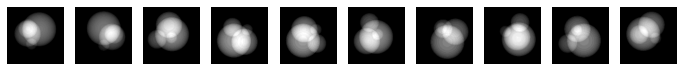

In [3]:
# display a few images
n = 10

_, axs = plt.subplots(1, n, figsize=(12, 12))
axs = axs.flatten()

for i in range(0,n) :
    axs[i].imshow(imgs[i], cmap='gray')
    axs[i].axis('off')
plt.show()

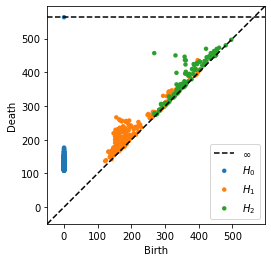

In [4]:
# compute persistence diagram and display it
# subsample 300 images to speed up computations

temp_ripser_out = ripser(dists, coeff=3, maxdim=2, distance_matrix = True, n_perm = 300)
temp_dgms = temp_ripser_out['dgms']
plot_diagrams(temp_dgms, show=True)

perm = temp_ripser_out['idx_perm']
dists_ = dists[perm,:][:,perm]
rots_ = rots[perm,:][:,perm]
ripser_out = ripser(dists_, coeff=3, maxdim=2, do_cocycles=True, distance_matrix = True)
dgms = ripser_out['dgms']

In [5]:
# compute an approximate cocycle given by the local trivialization
# compute the homological death so that it is a 1-approximate cocycle and display the death time

dth = approx_cocycle_vr_death_(dists_, rots_, tolerance=1)
print(dth)

317.4961613941183


In [27]:
%%time

# compute the Euler class of the cocycle

cocycle = approx_eu_vr_from_local_bases_(dists_, rots_, dth)

CPU times: user 185 ms, sys: 0 ns, total: 185 ms
Wall time: 182 ms


In [7]:
# write the mod 3 reduction of the Euler class in the basis given by the persistent cohomology computation
# NOTE: this is not optimized and can take more than 10GB of RAM

dgm2 = dgms[2]

M = matrix_from_edges_gen_cocycle_(dists_, ripser_out['cocycles'][2], dgm2[:,1], cocycle, dth)
sol = solve_system_mod(M, mod=3)

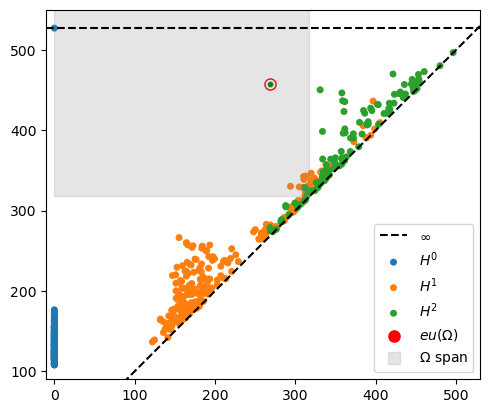

In [31]:
# display the persistence diagrams with the classes that sum to the mod 3 reduction of the Euler class highlighted

n_gens = len(ripser_out['cocycles'][2])
appear = np.nonzero(sol[:n_gens])

ax = plt.gca()
rect = patches.Rectangle((0, dth), dth, 1000, color="grey", alpha = 0.2)
ax.add_patch(rect)

plt.rcParams.update({'font.size' : 13})
plot_diagrams(dgms, show = False, labels=["$H^0$","$H^1$","$H^2$"], size = 25, xy_range=[-10,530, 90,550])
ax.scatter(dgm2[appear, 0], dgm2[appear, 1], 65, 'r', 'o', label="$eu(\Omega)$")
ax.scatter(dgm2[appear, 0], dgm2[appear, 1], 35, 'w', 'o')
ax.scatter(dgm2[appear, 0], dgm2[appear, 1], 10, 'green', 'o')
ax.scatter([],[], 65, 'grey', 's', alpha=0.2, label="$\Omega$ span")

ax.legend()
ax.set_xlabel("")
ax.set_ylabel("")
plt.show()